In [1]:
import os
import numpy as np
import pandas as pd

folder = "/mnt/d/TestData/fostrap/FTIG"

In [3]:
df = pd.read_csv(os.path.join(folder, "results", "df_user_counts.csv"))
df["animal"].fillna("FT164", inplace=True)
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
animals_to_check = df[df.duplicated()]["animal"].unique()
df = df[~df.duplicated()]

In [4]:
df_meta = pd.read_csv(os.path.join(folder, "results", "metafile_ftig.csv"))
df_meta.drop(['folder', 'slide1A', 'slide1B', 'slide1C'], axis=1, inplace=True)
df_meta.set_index("animal", inplace=True)

In [5]:
df = df.join(df_meta, on="animal")

In [6]:
df["density_fos"] = df["nfos"] / df["area"] * 100000
df["density_trap"] = df["ntrap"] / df["area"] * 100000
df["density_coloc"] = df["ncoloc"] / df["area"] * 100000

df["pc_fos_coloc"] = df["ncoloc"] / df["nfos"] * 100
df["pc_trap_coloc"] = df["ncoloc"] / df["ntrap"] * 100

In [7]:
df.replace({"malt ": "malt"}, inplace=True)

In [8]:
df["animal"].unique()

array(['FT104', 'FT106', 'FT108', 'FT109', 'FT110', 'FT111', 'FT118',
       'FT120', 'FT126', 'FT128', 'FT134', 'FT137', 'FT161', 'FT162',
       'FT163', 'FT164', 'FT168'], dtype=object)

In [9]:
df.groupby(by=["region", "diet", "animal", "infusion2"]).mean().to_csv(os.path.join(folder, "results", "grouped.csv"))

/tmp/ipykernel_167/791883629.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by=["region", "diet", "animal", "infusion2"]).mean().to_csv(os.path.join(folder, "results", "grouped.csv"))


Text(0, 0.5, 'Density of trapped cells')

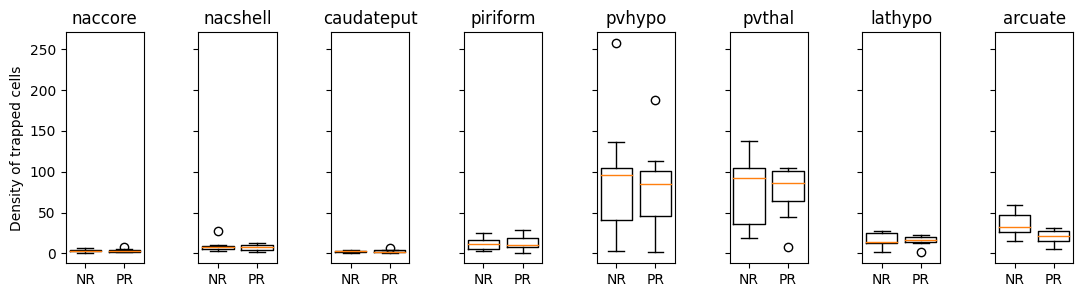

In [55]:
import trompy as tp
import matplotlib.pyplot as plt

regions = df["region"].unique()

f, ax = plt.subplots(figsize=(13,3), ncols=len(regions), sharey=True,
                    gridspec_kw={"wspace": 0.7})

for region, axis in zip(regions, ax):
    df1 = df.query("region == @region")
    df2 = df1.groupby(by=["diet", "animal"])["density_trap"].mean()
    axis.boxplot((df2["NR"], df2["PR"]), widths=0.8, labels = ("NR", "PR"))
    axis.set_title(region)
    
ax[0].set_ylabel("Density of trapped cells")


In [56]:
df.groupby(by=["region", "infusion2"]).mean().to_csv(os.path.join(folder, "results", "grouped_mean_byinf.csv"))

/tmp/ipykernel_167/2473218668.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by=["region", "infusion2"]).mean().to_csv(os.path.join(folder, "results", "grouped_mean_byinf.csv"))


Text(0, 0.5, 'Percent of trapped cells + Fos')

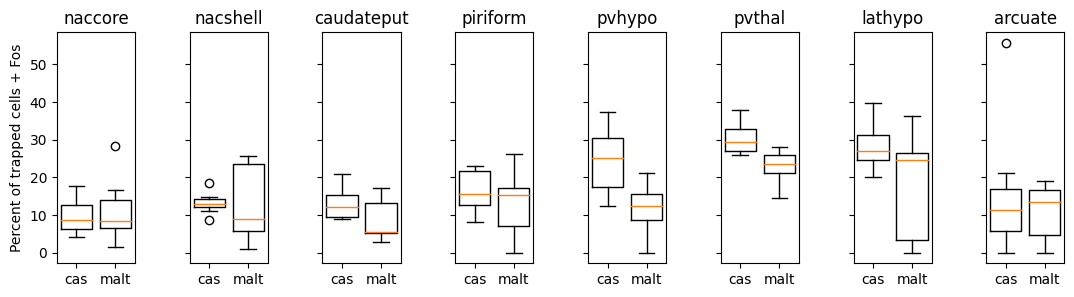

In [69]:
f, ax = plt.subplots(figsize=(13,3), ncols=len(regions), sharey=True,
                    gridspec_kw={"wspace": 0.7})

for region, axis in zip(regions, ax):
    df1 = df.query("region == @region")
    df2 = df1.groupby(by=["infusion2", "animal"])["pc_trap_coloc"].mean()
    axis.boxplot((df2["casein"], df2["malt"]), widths=0.8, labels = ("cas", "malt"))
    axis.set_title(region)
    
ax[0].set_ylabel("Percent of trapped cells + Fos")



In [67]:
df2

infusion2  animal
casein     FT104     13.888889
           FT106     12.111111
           FT118      4.305556
           FT120      7.407407
           FT126      5.795686
           FT128     17.699334
           FT134      6.483516
           FT137     10.096154
malt       FT108      1.538462
           FT109      8.333333
           FT110     28.333333
           FT111      6.597222
           FT161     14.125550
           FT162      7.424603
           FT163     16.666667
           FT164     11.363636
           FT168      4.166667
Name: pc_trap_coloc, dtype: float64

<Axes: >

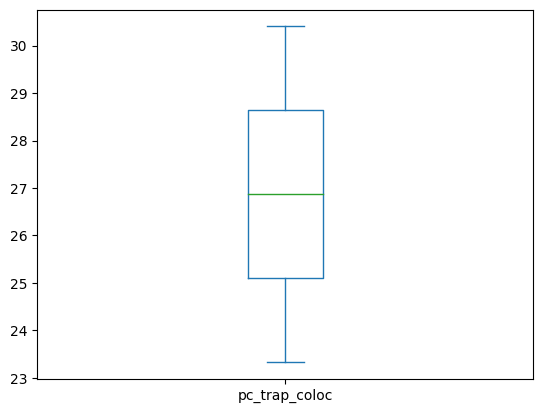

In [58]:
df2.plot(x="diet", kind="box", use_index=True)

In [35]:
df2.plot?

In [40]:
plt.boxplot?

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb89b2bb8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb89b2bbe50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb89b2bb790>,
 'medians': [<matplotlib.lines.Line2D at 0x7fb89b2ce3d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb89b2ce670>,
 'means': []}

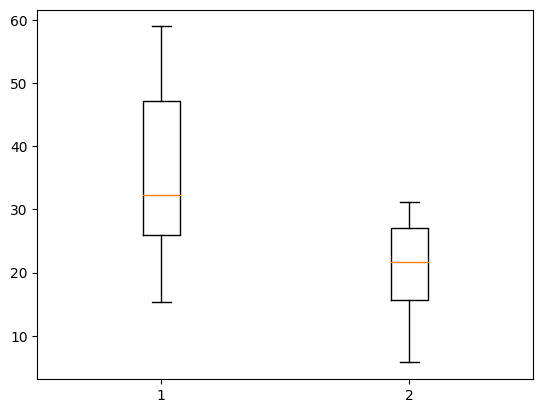

In [42]:
import matplotlib.pyplot as plt
plt.boxplot((df2["NR"], df2["PR"]))

In [26]:
tp.barscatter([df2["NR"], df2["PR"]])

AttributeError: module 'trompy' has no attribute 'mean_and_sem'

In [27]:
dir(tp)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'ax2prop',
 'barscatter',
 'bonferroni_corrected_ttest',
 'burstlengthFig',
 'burstprobFig',
 'calculate_burst_prob',
 'checknsessions',
 'discrete2continuous',
 'download_data',
 'event2sample',
 'fig_utils',
 'find_overlap',
 'findnoise',
 'findpercentilevalue',
 'fit_weibull',
 'flatten_list',
 'general_utils',
 'get_violinstats',
 'getuserhome',
 'ibiFig',
 'iliFig',
 'invisible_axes',
 'isnumeric',
 'lickCalc',
 'lick_figs',
 'lick_utils',
 'licklengthFig',
 'lighten_color',
 'logical_subset',
 'makeheatmap',
 'makerandomevents',
 'mastersnipper',
 'mean_and_sem',
 'med_abs_dev',
 'medfilereader',
 'medfilereader_licks',
 'merge_fed_files',
 'merge_files',
 'metafilemaker',
 'metafilereader',
 'nanroc',
 'parse_args',
 'plot_ROC_and_line',
 'processdata',
 'random_array',
 'remcheck',
 'removenoise',
 'removeshortbursts',
 'resample_snips',
 'rocN',
 'roc